In [26]:
import pandas as pd
import numpy as np
from pandas.io.data import DataReader
from pandas.io.data import get_data_yahoo
from datetime import datetime

startTime = datetime(2000,1,1)
endTime = datetime(2016,7,6)
company = 'GOOG'


In [27]:
# Introduce stock indices: nasdaq,dji,frankfurt,london,tokyo,hk,australia
def getStockData(symbol, start, end, getVolume=False):
    """
    Downloads Stock from Yahoo Finance.
    Computes daily Returns based on Adj Close.
    Returns pandas dataframe.
    """
    df = get_data_yahoo(symbol, start, end)

    df.rename(columns = {'Adj Close' : 'AdjClose' + '_' + symbol}, inplace=True)
    
    ed = -2 if getVolume else -1
    return df.drop(df.columns[:ed], axis = 1)

In [28]:
indices_list = [company,'^IXIC','^DJI','^GSPC','^GDAXI','^FTSE','^N225','^HSI','^AXJO']
raw_data = []
raw_data.append(getStockData(indices_list[0], startTime, endTime, getVolume=True))
volume_data = raw_data[0].Volume
raw_data[0] = raw_data[0].drop(raw_data[0].columns[0], axis = 1)

for indice in indices_list[1:]:
    raw_data.append(getStockData(indice, startTime, endTime, getVolume=False))

print len(raw_data)
print raw_data[0].head(), "\n",volume_data.head()


9
            AdjClose_GOOG
Date                     
2004-08-19      50.119968
2004-08-20      54.100990
2004-08-23      54.645447
2004-08-24      52.382705
2004-08-25      52.947145 
Date
2004-08-19    44871300
2004-08-20    22942800
2004-08-23    18342800
2004-08-24    15319700
2004-08-25     9232100
Name: Volume, dtype: int64


In [43]:


## define parameters
## -----------------------------------------------

N_history = 13
forcast = 2 # in how many days the system will predict
return_eval_list = [1,2,3,5,8,13]
avg_return_span_list = return_eval_list[1:]
volume_rolling_win = N_history * forcast
PCA_n = 10

## merge stock prices and indices and generate past N_history day records as features
## -----------------------------------------------

meg_data = pd.concat(raw_data, axis=1, join='inner')
print volume_data.tail()
print meg_data.tail()
for i in range(len(raw_data)):
    for j in range(N_history):
        t = forcast * (j + 1);
        meg_data[meg_data.columns.values[i] + str(t)] = meg_data.iloc[:, i].shift(t)

print "\n Merged Data w/ past N_history day records as features: \n",meg_data.columns.values, '\n', meg_data.head(volume_rolling_win + 1)

## Generating return and average return over a list of period to capture stock history movements
## -----------------------------------------------

returnList = forcast * np.array(return_eval_list)
avgReturnList = forcast * np.array(avg_return_span_list)
print "\n return calculation period list \n",returnList
print "\n avg. return calculation period list \n",avgReturnList

return_data = pd.DataFrame()
return_data['return'] = meg_data.iloc[:,0].pct_change(returnList[0])

for i in returnList[1:]:
    return_data['return'+str(i)] = meg_data.iloc[:,0].pct_change(i)

for i in avgReturnList:
    return_data['avgReturn'+str(i)] = return_data['return'].rolling(i).mean()
    
print "\n return_data \n", return_data.tail()

## Normalize Volume Data and compare to its standard deviation
## -----------------------------------------------

volume_norm = (volume_data - volume_data.rolling(volume_rolling_win).mean()) / volume_data.rolling(volume_rolling_win).std()
print "\n rolling normallized volume \n", volume_norm.tail()

Date
2016-06-29    1932600
2016-06-30    1597700
2016-07-01    1342700
2016-07-05    1446100
2016-07-06    1408600
Name: Volume, dtype: int64
            AdjClose_GOOG  AdjClose_^IXIC  AdjClose_^DJI  AdjClose_^GSPC  \
Date                                                                       
2016-06-28     680.039978     4691.870117   17409.720703     2036.089966   
2016-06-29     684.109985     4779.250000   17694.679688     2070.770020   
2016-06-30     692.099976     4842.669922   17929.990234     2098.860107   
2016-07-05     694.950012     4822.899902   17840.619141     2088.550049   
2016-07-06     697.770020     4859.160156   17918.619141     2099.729980   

            AdjClose_^GDAXI  AdjClose_^FTSE  AdjClose_^N225  AdjClose_^HSI  \
Date                                                                         
2016-06-28      9447.280273     6140.399902    15323.139648   20172.460938   
2016-06-29      9612.269531     6360.100098    15566.830078   20436.119141   
2016-06-30   

PCA explained variance ratio =  [ 0.82229346  0.09966299  0.03640801  0.02246935  0.00485653  0.00407282
  0.00198461  0.00118829  0.00110357  0.00102838]
Date
2004-08-19    1
2004-08-20   -1
2004-08-23   -1
2004-08-24    1
2004-08-25    1
2004-08-26   -1
2004-08-27   -1
2004-08-30   -1
2004-08-31   -1
2004-09-01   -1
2004-09-02    1
2004-09-03    1
2004-09-07    1
2004-09-08    1
2004-09-09    1
2004-09-10    1
2004-09-13    1
2004-09-14    1
2004-09-15    1
2004-09-16    1
2004-09-17    1
2004-09-21    1
2004-09-22   -1
2004-09-24    1
2004-09-27    1
2004-09-28    1
2004-09-30    1
2004-10-04    1
2004-10-05    1
2004-10-06    1
             ..
2016-05-19    1
2016-05-20    1
2016-05-23    1
2016-05-24    1
2016-05-25    1
2016-05-26    1
2016-05-27    1
2016-05-31   -1
2016-06-01   -1
2016-06-02   -1
2016-06-03   -1
2016-06-06    1
2016-06-07    1
2016-06-08   -1
2016-06-10   -1
2016-06-14   -1
2016-06-15   -1
2016-06-16   -1
2016-06-17    1
2016-06-20    1
2016-06-21    1
2016-06-

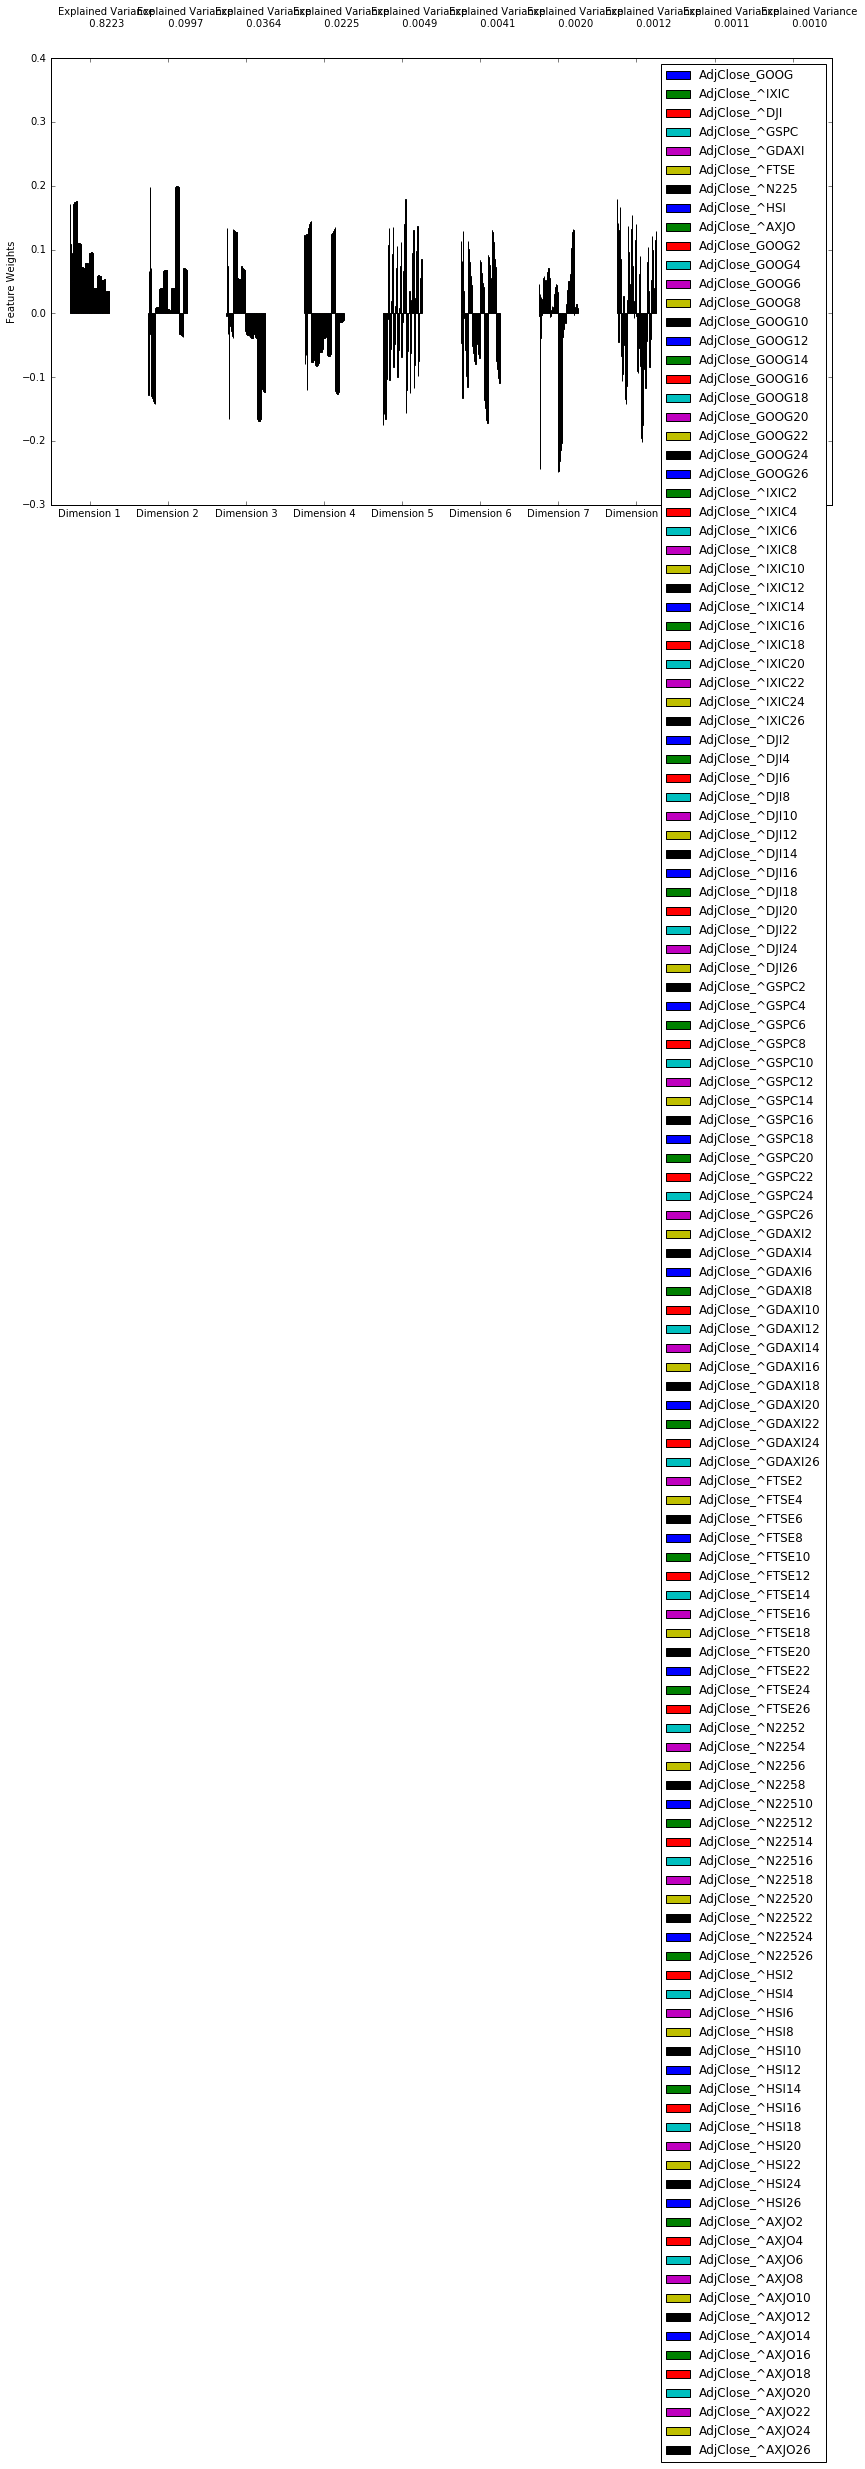

In [44]:
import renders as rs
from IPython.display import display
from sklearn.decomposition import PCA


## PCA
## -----------------------------------------------

# TODO: Scale the data using the natural logarithm
meg_data = meg_data.dropna()
log_data = np.log(meg_data)
#print "log data: ", log_data

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = PCA_n)
pca.fit(log_data)
print "PCA explained variance ratio = ", pca.explained_variance_ratio_

# Generate PCA results plot
pca_results = rs.pca_results(log_data, pca)

# TODO: Transform the data using the PCA fit above
reduced_data = pca.transform(log_data)
reduced_data = pd.DataFrame(reduced_data, index=log_data.index)
#print reduced_data.shape, reduced_data

## Combine Overall Data Set
## -----------------------------------------------

data = pd.concat([reduced_data, return_data, volume_norm], axis=1, join='inner')
data = data.dropna()
#print data

## Generate Labels
## -----------------------------------------------

y_raw = return_data['return'].shift(-returnList[0])
comp = lambda x: (1 if x > 0 else -1)
y_raw = y_raw.apply(comp)
print y_raw

x_endtime = data.iloc[-1]    # feature of last day, used for final stock prediction
data = data.drop(data.index[-returnList[0]:], axis = 0)    # remove last forcast days, useless for model training
y = pd.Series(y_raw, index = data.index)    # align labels to data indexes

print "\n data for train/test: ", data.shape, "\n", data.tail(volume_rolling_win),'\n',data.columns.values
print "stock return:", data['return']
print "\n labels: ", y.shape, "\n", y#.tail(volume_rolling_win)

In [31]:
# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=42)


In [47]:
%matplotlib inline 
from time import time
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fa_score(ytrue, ypred, pos_label=1):
    return min(f1_score(ytrue, ypred, pos_label=1), accuracy_score(ytrue, ypred))

def train_classifier(clf, X_train, y_train, gridSearch=False, parameters=None):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    
    print X_train.shape, y_train.shape
    if not gridSearch:
        clf.fit(X_train, y_train)
    else:
        f1_scorer = make_scorer(f1_score, pos_label=1)
        accu_scorer = make_scorer(accuracy_score)
        fa_scorer = make_scorer(fa_score)
        grid_obj = GridSearchCV(clf, parameters, scoring = fa_scorer)
        grid_obj.fit(X_train, y_train)
        print "GridSearch Best Parameters: ", grid_obj.best_params_, '=', grid_obj.best_score_
        clf = grid_obj.best_estimator_
    
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)
    return clf
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    #print "labels: \n", target.values
    #print "preds: \n", y_pred
    return f1_score(target.values, y_pred, pos_label=1), accuracy_score(target.values, y_pred),\
            recall_score(target.values, y_pred), precision_score(target.values, y_pred)


def train_predict(clf, X_train, y_train, X_test, y_test, gridSearch=False, parameters=None):
    ''' Train and predict using a classifer based on F1 score. '''

    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    clf = train_classifier(clf, X_train, y_train, gridSearch, parameters)
    
    # Print the results of prediction for both training and testing
    f1train, atrain, rtrain, ptrain = predict_labels(clf, X_train, y_train)
    print "For training set:",'\naccuracy =',atrain, '\nprecision =', ptrain, '\nrecall =', rtrain, '\nf1 =',f1train
    f1test, atest, rtest, ptest = predict_labels(clf, X_test, y_test)
    print "For testing set:",'\naccuracy =',atest, '\nprecision =', ptest, '\nrecall =', rtest, '\nf1 =',f1test
    
    return clf, min(f1test,atest)
    
def plotROC(clf, X_test, y_test):
    # Determine the false positive and true positive rates
    print "output labels belong to : ", clf.classes_
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    print 'ROC AUC: %0.2f' % roc_auc
    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
def compBestClf(clf_cand, score_cand, clf_best, score_best):
    if score_cand > score_best: 
        score_best = score_cand
        clf_best = clf_cand
    return clf_best, score_best

In [33]:
# Variables to compare and find best classifier model
clf_best = None
score_best = 0

Training a AdaBoostClassifier using a training set size of 1999. . .
(1999, 22) (1999,)
GridSearch Best Parameters:  {'n_estimators': 2, 'learning_rate': 0.1} = 0.536268134067
Trained model in 6.2677 seconds
Made predictions in 0.0012 seconds.
For training set: 
accuracy = 0.543771885943 
precision = 0.540867810293 
recall = 0.998137802607 
f1 = 0.701570680628
Made predictions in 0.0006 seconds.
For testing set: 
accuracy = 0.544227886057 
precision = 0.541729893778 
recall = 0.994428969359 
f1 = 0.70137524558
output labels belong to :  [-1  1]
ROC AUC: 0.52


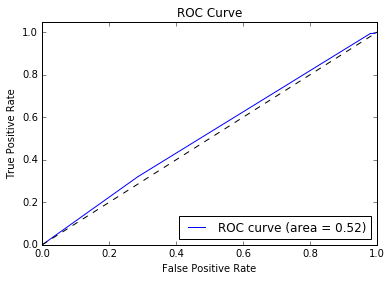

In [34]:
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_Bst = AdaBoostClassifier(n_estimators=20)

# TODO: Execute the 'train_predict' function for each classifier and each training set size
param_Bst = {'n_estimators': [2, 3, 5, 10, 20, 50], 'learning_rate': [0.1, 0.5, 1]}
clf_Bst, f1_Bst = train_predict(clf_Bst, X_train, y_train, X_test, y_test, gridSearch=True, parameters = param_Bst)

plotROC(clf_Bst, X_test, y_test)

# compare best clf
clf_best, score_best = compBestClf(clf_Bst, f1_Bst, clf_best, score_best)

Training a RandomForestClassifier using a training set size of 1999. . .
(1999, 22) (1999,)
GridSearch Best Parameters:  {'n_estimators': 80, 'max_depth': 8} = 0.565782891446
Trained model in 31.6826 seconds
Made predictions in 0.1127 seconds.
For training set: 
accuracy = 0.874437218609 
precision = 0.817760617761 
recall = 0.986033519553 
f1 = 0.89404812157
Made predictions in 0.1087 seconds.
For testing set: 
accuracy = 0.584707646177 
precision = 0.582329317269 
recall = 0.807799442897 
f1 = 0.676779463244
output labels belong to :  [-1  1]
ROC AUC: 0.62


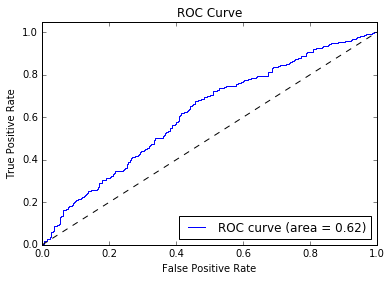

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators=10, n_jobs=-1)

param_RF = {'n_estimators': [5, 10, 20, 40, 80, 160], 'max_depth': [2,3,4,8]}
clf_RF, f1_RF = train_predict(clf_RF, X_train, y_train, X_test, y_test, gridSearch=True, parameters = param_RF)

plotROC(clf_RF, X_test, y_test)

# compare best clf
clf_best, score_best = compBestClf(clf_RF, f1_RF, clf_best, score_best)

Training a GaussianNB using a training set size of 1999. . .
(1999, 22) (1999,)
Trained model in 0.0035 seconds
Made predictions in 0.0013 seconds.
For training set: 
accuracy = 0.539769884942 
precision = 0.554225352113 
recall = 0.732774674115 
f1 = 0.631114675221
Made predictions in 0.0005 seconds.
For testing set: 
accuracy = 0.52023988006 
precision = 0.543429844098 
recall = 0.679665738162 
f1 = 0.60396039604
output labels belong to :  [-1  1]
ROC AUC: 0.52


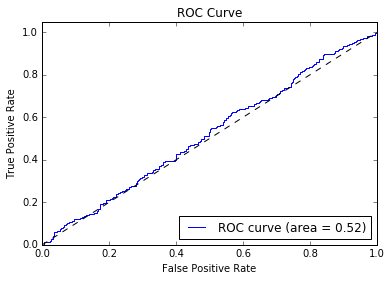

In [36]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()

clf_NB, f1_NB = train_predict(clf_NB, X_train, y_train, X_test, y_test)

plotROC(clf_NB, X_test, y_test)

# compare best clf
clf_best, score_best = compBestClf(clf_NB, f1_NB, clf_best, score_best)

Training a DecisionTreeClassifier using a training set size of 1999. . .
(1999, 22) (1999,)
GridSearch Best Parameters:  {'min_samples_split': 2, 'max_depth': 2} = 0.536268134067
Trained model in 1.6453 seconds
Made predictions in 0.0004 seconds.
For training set: 
accuracy = 0.544772386193 
precision = 0.541330645161 
recall = 1.0 
f1 = 0.702419882276
Made predictions in 0.0002 seconds.
For testing set: 
accuracy = 0.542728635682 
precision = 0.540909090909 
recall = 0.994428969359 
f1 = 0.700686947988
output labels belong to :  [-1  1]
ROC AUC: 0.52


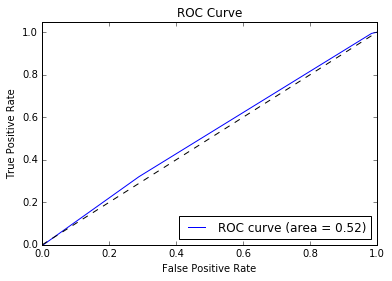

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier(random_state=0, min_samples_split=80)

param_DT = {'min_samples_split': [2,5,10,50,100,200], 'max_depth': [2,3,5,8]}
clf_DT, f1_DT = train_predict(clf_DT, X_train, y_train, X_test, y_test, gridSearch=True, parameters = param_DT)

plotROC(clf_DT, X_test, y_test)

# compare best clf
clf_best, score_best = compBestClf(clf_DT, f1_DT, clf_best, score_best)

Training a SVC using a training set size of 1999. . .
(1999, 22) (1999,)
Trained model in 1791.3815 seconds
Made predictions in 0.1112 seconds.
For training set: 
accuracy = 0.63831915958 
precision = 0.630483271375 
recall = 0.7895716946 
f1 = 0.701116163704
Made predictions in 0.0347 seconds.
For testing set: 
accuracy = 0.554722638681 
precision = 0.570135746606 
recall = 0.701949860724 
f1 = 0.629213483146
output labels belong to :  [-1  1]
ROC AUC: 0.56


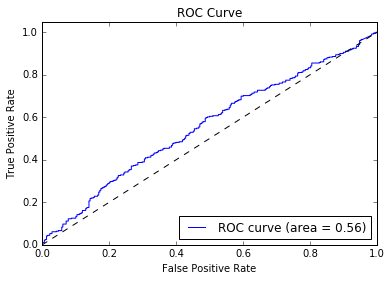

In [46]:
from sklearn import svm

# TODO: Initialize the three models
clf_SVM = svm.SVC(C = 36, gamma = 4, degree = 2, kernel='poly', probability=True)

# TODO: Execute the 'train_predict' function for each classifier and each training set size
param_SVM = {'C': [1,6,36], 'gamma': [0.5,2,4], 'degree': [2,3]}
clf_SVM, f1_SVM = train_predict(clf_SVM, X_train, y_train, X_test, y_test, gridSearch=True, parameters = param_SVM)

plotROC(clf_SVM, X_test, y_test)

# compare best clf
clf_best, score_best = compBestClf(clf_SVM, f1_SVM, clf_best, score_best)

Training a KNeighborsClassifier using a training set size of 1999. . .
(1999, 22) (1999,)
GridSearch Best Parameters:  {'n_neighbors': 32} = 0.511255627814
Trained model in 0.3671 seconds
Made predictions in 0.0574 seconds.
For training set: 
accuracy = 0.607803901951 
precision = 0.619439868204 
recall = 0.700186219739 
f1 = 0.657342657343
Made predictions in 0.0185 seconds.
For testing set: 
accuracy = 0.538230884558 
precision = 0.56836461126 
recall = 0.590529247911 
f1 = 0.579234972678
output labels belong to :  [-1  1]
ROC AUC: 0.55


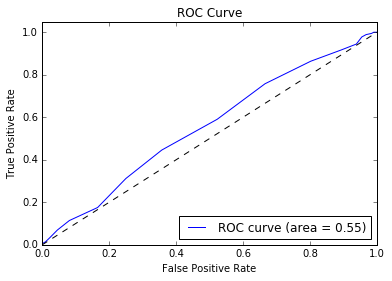

In [39]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=4)

param_KNN = {'n_neighbors':[2,4,8,16,32]}
clf_KNN, f1_KNN = train_predict(clf_KNN, X_train, y_train, X_test, y_test, gridSearch=True, parameters = param_KNN)

plotROC(clf_KNN, X_test, y_test)
             
# compare best clf
clf_best, score_best = compBestClf(clf_KNN, f1_KNN, clf_best, score_best)

Best Classifier is: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Best Classifier's Score on test:  0.584707646177
output labels belong to :  [-1  1]
ROC AUC: 0.62


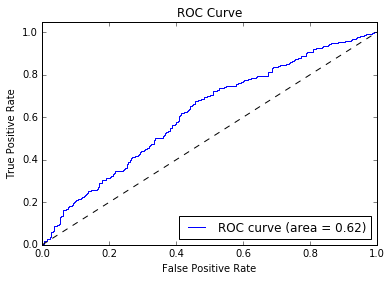

Predict: 
GOOG stock after 2 days of 2016-07-06 00:00:00 
is going to (with confidence FALL/RISE = [[ 0.45574552  0.54425448]] ): RISE


In [40]:
## Output Classifier Model Selection Sumary and Best Prediction Result
## -----------------------------------------------

print "Best Classifier is: \n", clf_best
print "Best Classifier's Score on test: ", score_best

plotROC(clf_best, X_test, y_test)

x_endtime_row = x_endtime.reshape(1, -1)
pred_v = clf_best.predict(x_endtime_row)
pred_p = clf_best.predict_proba(x_endtime_row)
pred_str = "RISE" if pred_v > 0 else "FALL"
print "Predict: \n", company, "stock after", forcast, "days of", x_endtime.name, \
    "\nis going to (with confidence FALL/RISE =", pred_p, "):" , pred_str